In [1]:
library(targets)
library(tidyverse)
library(Seurat)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:base’:

    intersect




In [76]:
source('resolve_cellbender.R')

In [83]:
obj = qs::qread('_targets/objects/xe_')
obj

An object of class Seurat 
400 features across 38520 samples within 4 assays 
Active assay: Xenium (100 features, 85 variable features)
 3 layers present: counts, data, scale.data
 3 other assays present: BlankCodeword, ControlCodeword, ControlProbe
 2 dimensional reductions calculated: pca, umap
 8 spatial fields of view present: fov fov.2 fov.3 fov.4 fov.5 fov.6 fov.7 fov.8

In [84]:
obj %>% `[[` %>% distinct(class)

class 
Cell10000_9129_13312_1 neuron
Cell10007_5614_2509_1  other

In [86]:
obj_50k = qs::qread('_targets/objects/xe_obj_cca_td_2s')
obj_50k

An object of class Seurat 
400 features across 55542 samples within 4 assays 
Active assay: Xenium (100 features, 99 variable features)
 3 layers present: scale.data, data, counts
 3 other assays present: BlankCodeword, ControlCodeword, ControlProbe
 2 dimensional reductions calculated: pca, umap
 15 spatial fields of view present: fov fov.2 fov.3 fov.4 fov.5 fov.6 fov.7 fov.8 fov.2.2 fov.3.2 fov.4.2 fov.5.2 fov.6.2 fov.7.2 fov.8.2

In [124]:
obj_50k %>% qs::qsave('obj_50k.qs')

In [94]:
cutoff_size = 2000

meta = obj_50k %>%
`[[` %>%
mutate(cells_bigger = case_when(cell_area > cutoff_size ~ 'bigger',
                                cell_area <= cutoff_size ~ 'smaller'))

obj = obj_50k %>% AddMetaData(meta)
obj

An object of class Seurat 
400 features across 55542 samples within 4 assays 
Active assay: Xenium (100 features, 99 variable features)
 3 layers present: scale.data, data, counts
 3 other assays present: BlankCodeword, ControlCodeword, ControlProbe
 2 dimensional reductions calculated: pca, umap
 15 spatial fields of view present: fov fov.2 fov.3 fov.4 fov.5 fov.6 fov.7 fov.8 fov.2.2 fov.3.2 fov.4.2 fov.5.2 fov.6.2 fov.7.2 fov.8.2

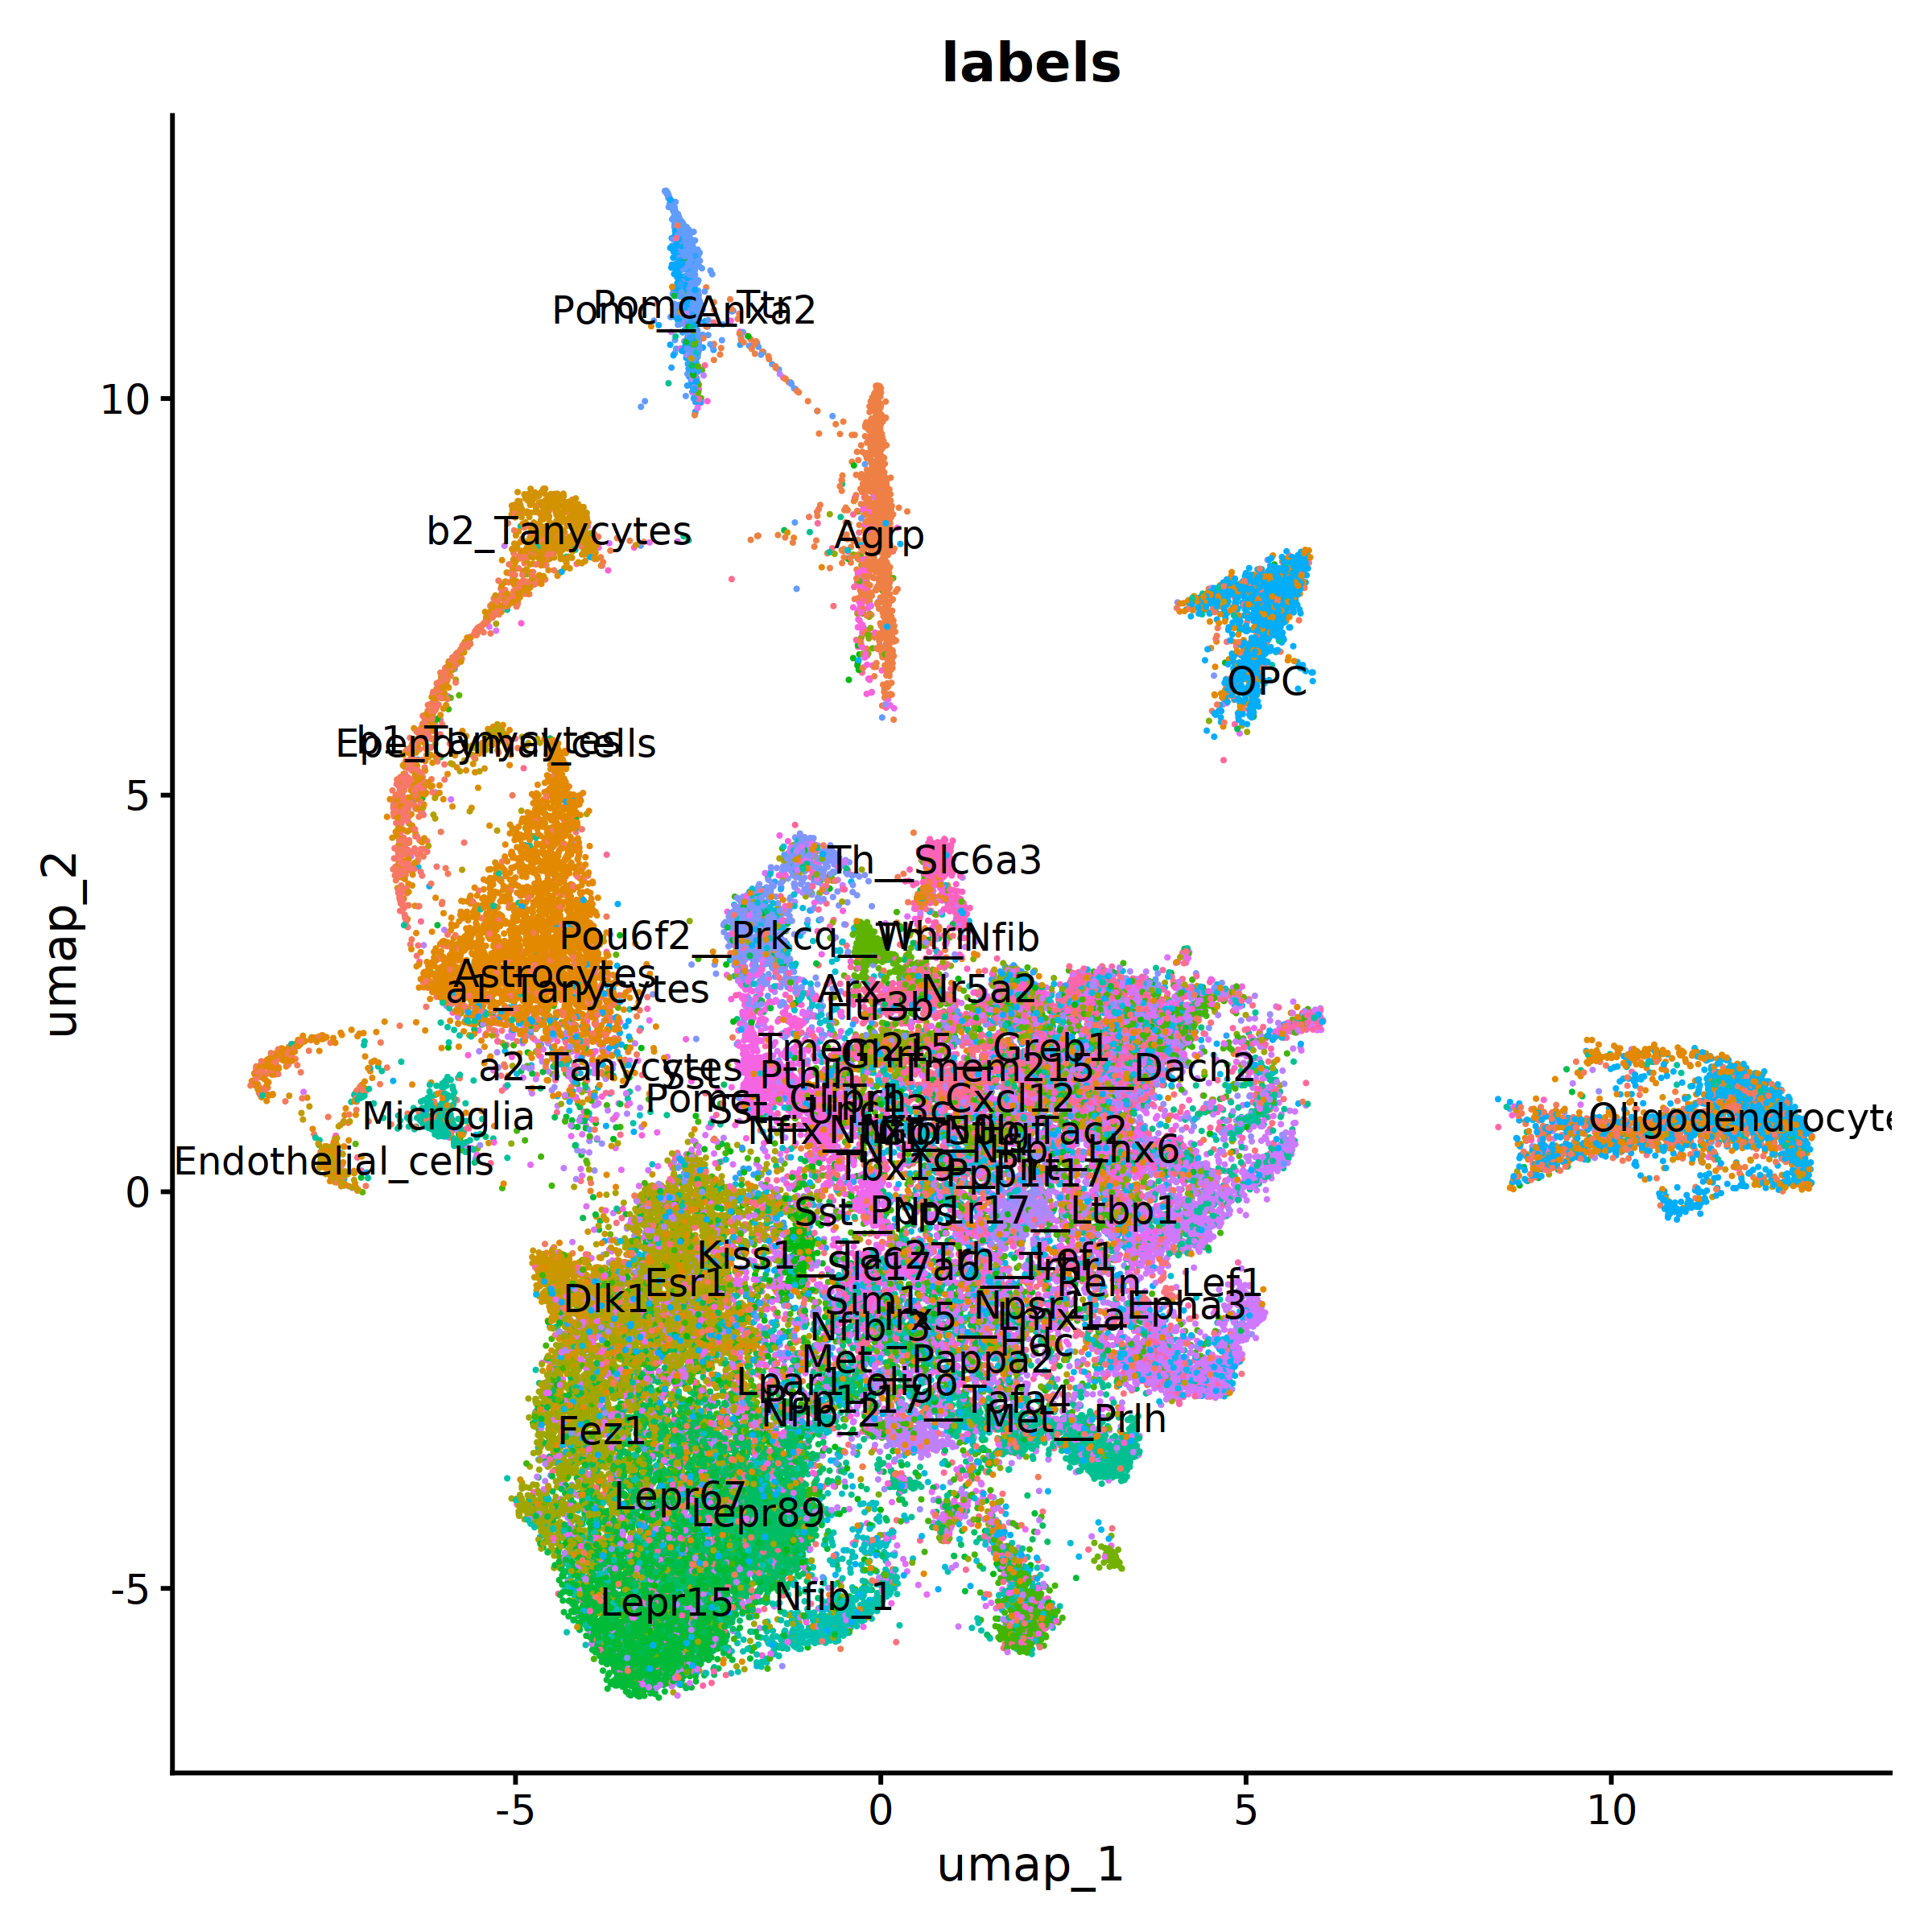

In [96]:
options(repr.plot.width=8, repr.plot.height=8, repr.plot.res=300)
DimPlot(obj, group.by = 'labels', label=TRUE) + NoLegend()

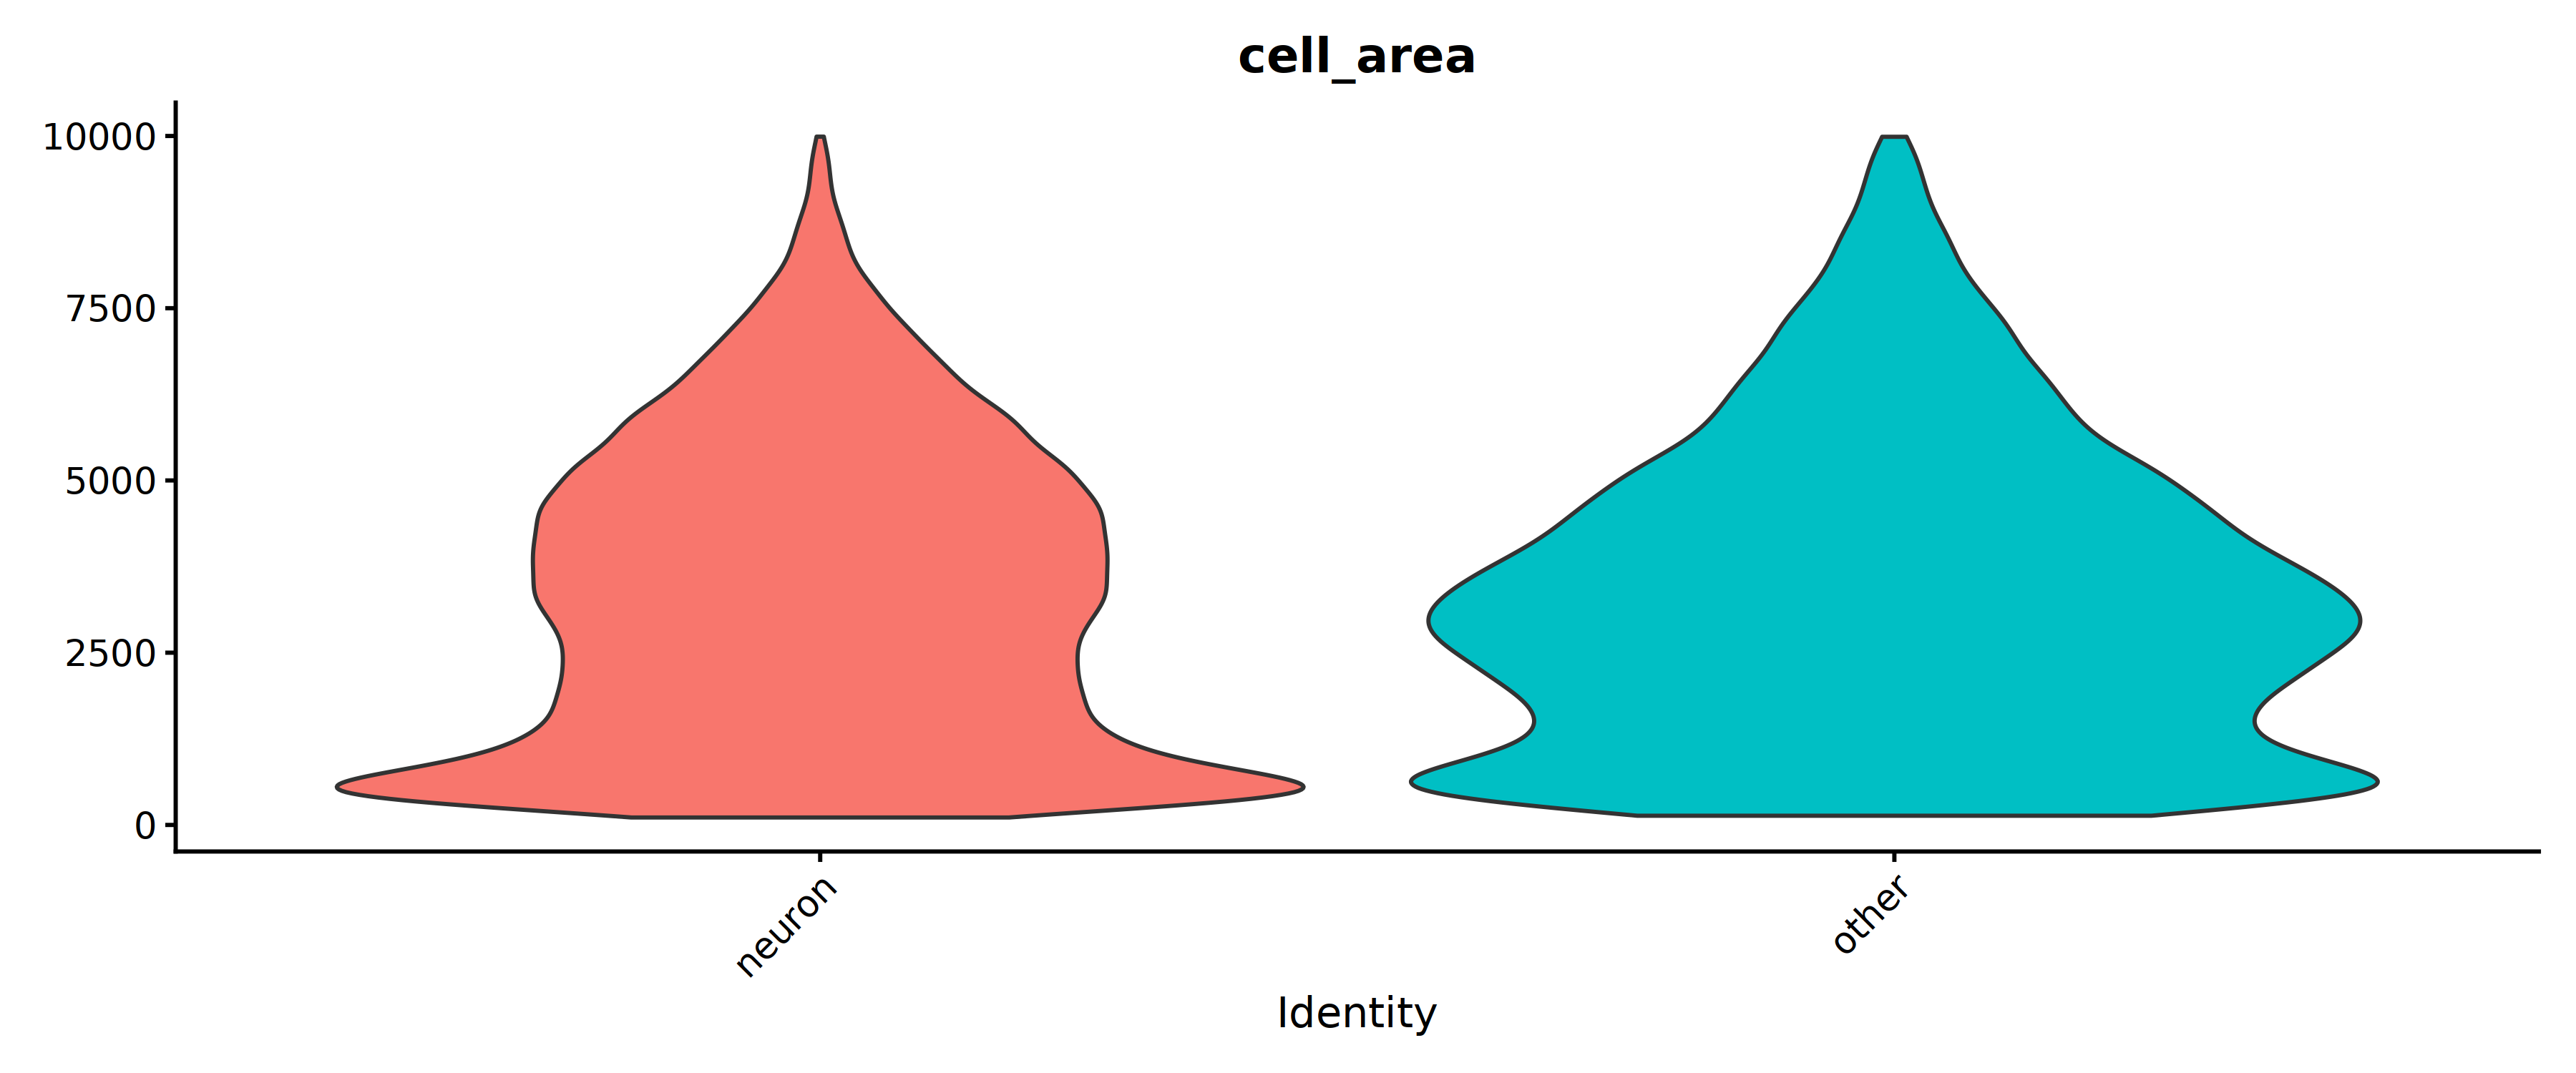

In [102]:
options(repr.plot.width=12, repr.plot.height=5, repr.plot.res=300) 
obj %>% VlnPlot(features = 'cell_area', group.by='cell_class', pt.size = 0) + NoLegend()

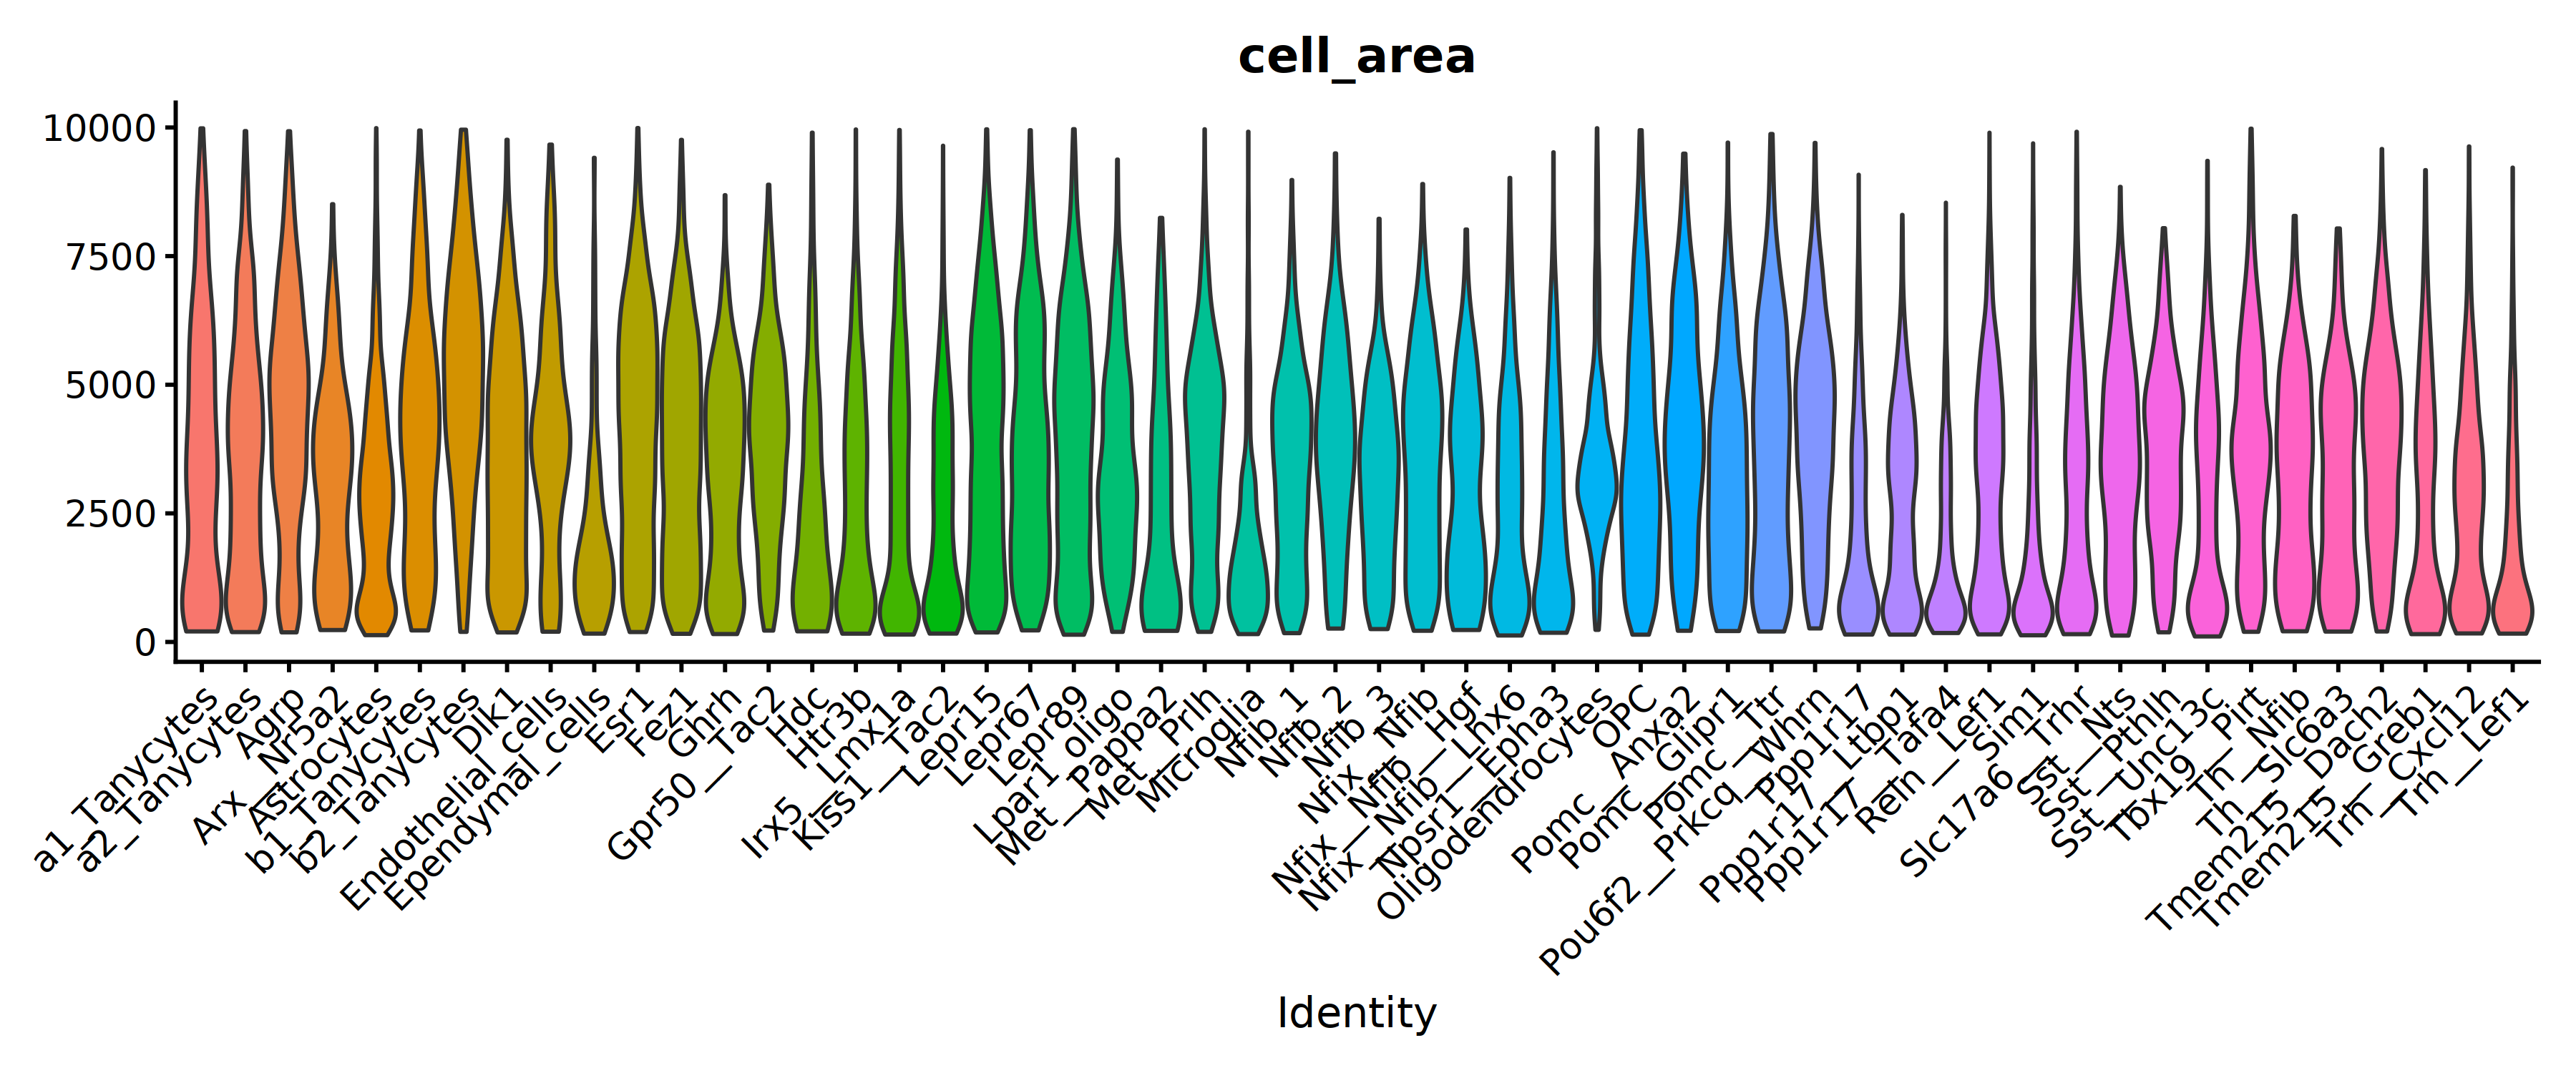

In [103]:
options(repr.plot.width=12, repr.plot.height=5, repr.plot.res=300) 
obj %>% VlnPlot(features = 'cell_area', group.by='labels', pt.size = 0) + NoLegend()

In [106]:
obj %>% `[[` %>% filter(cell_area > 1000) %>% dim

[1] 44707    26

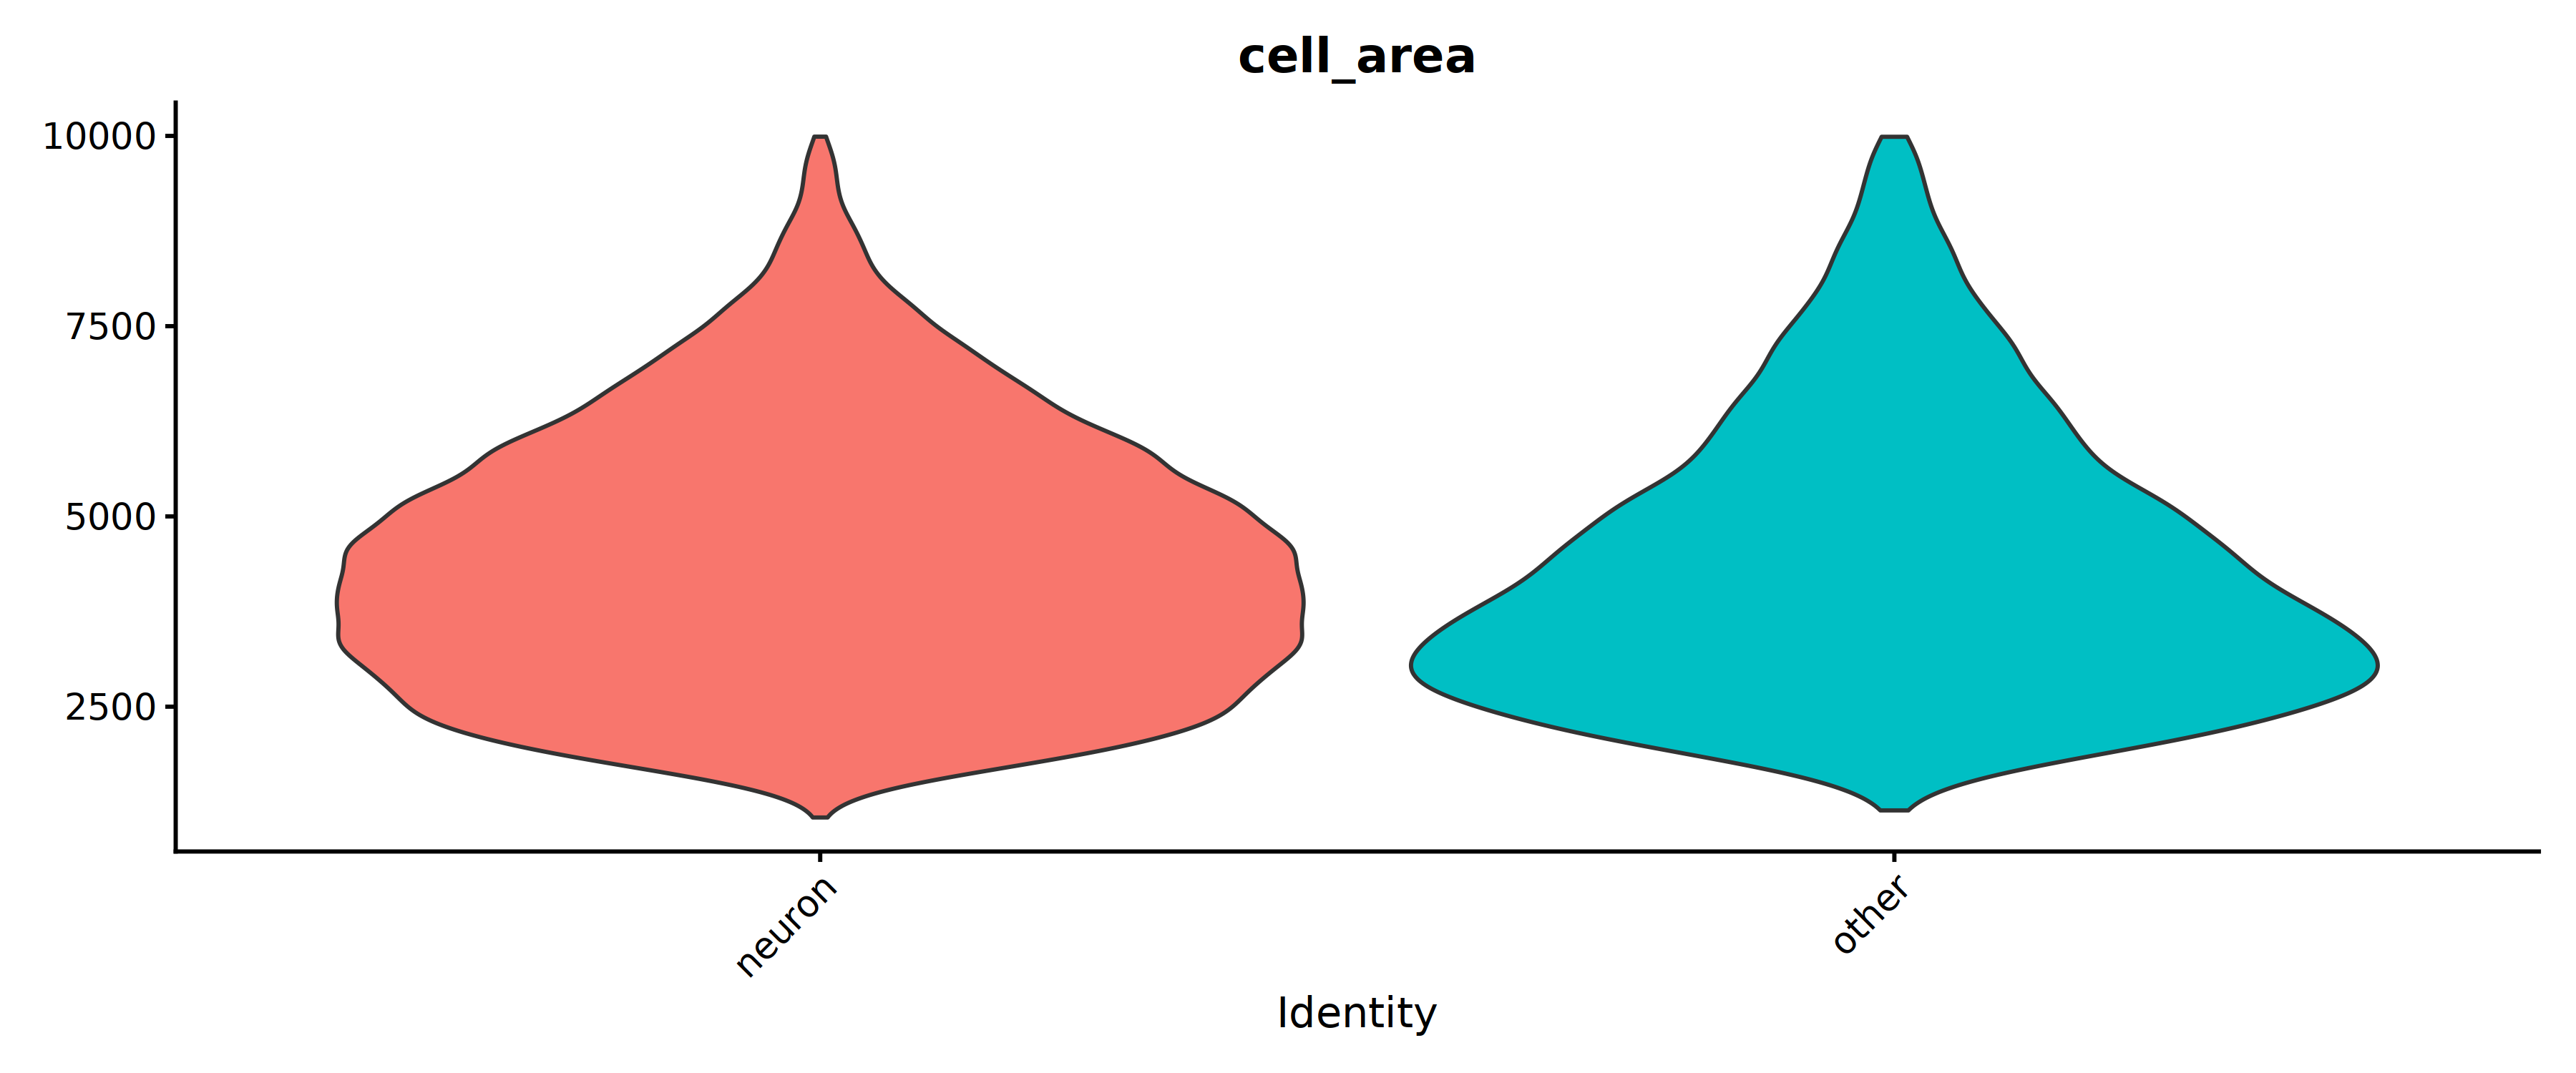

In [111]:
options(repr.plot.width=12, repr.plot.height=5, repr.plot.res=300) 
obj %>% subset(subset = nCount_Xenium >= 100) %>% VlnPlot(features = 'cell_area', group.by='cell_class', pt.size = 0) + NoLegend()

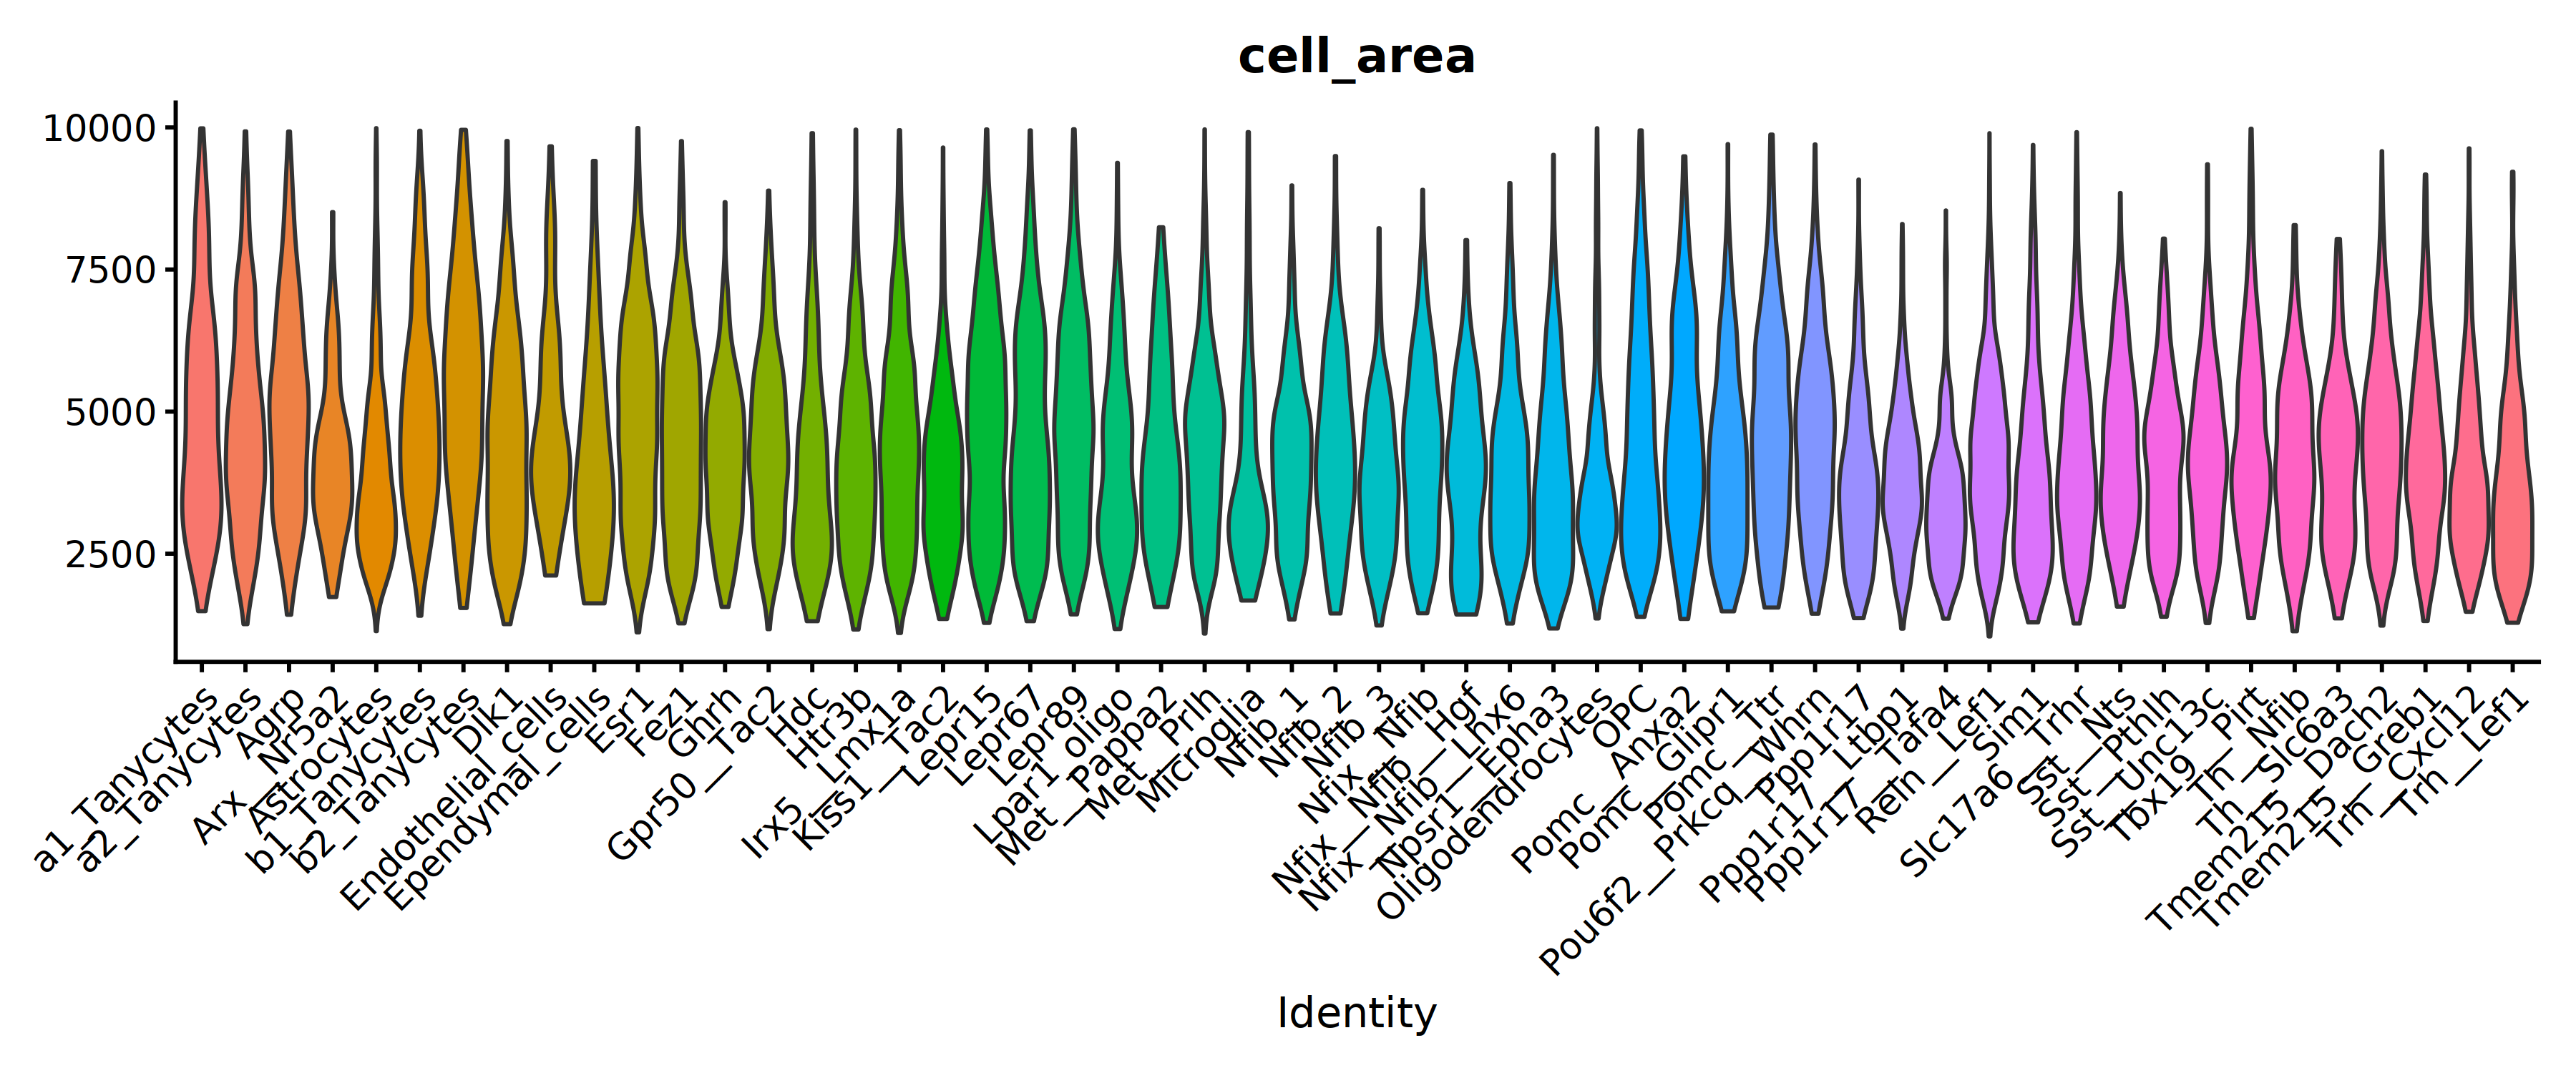

In [112]:
options(repr.plot.width=12, repr.plot.height=5, repr.plot.res=300) 
obj %>% subset(subset = nCount_Xenium >= 100) %>%  VlnPlot(features = 'cell_area', group.by='labels', pt.size = 0) + NoLegend()

In [114]:
areaToDiameter <- function(area) {
  diameter <- 2 * sqrt(area / pi)
  return(diameter)
}

In [119]:
convertAreaToMicronsSquared <- function(areaInPixels) {
  conversionFactor <- 0.138^2
  areaInMicronsSquared <- areaInPixels * conversionFactor
  return(areaInMicronsSquared)
}


In [120]:
obj = obj %>% AddMetaData(obj %>% `[[` %>% mutate(diameter = areaToDiameter(cell_area)*0.138) %>% mutate(micron_area = convertAreaToMicronsSquared(cell_area))) 

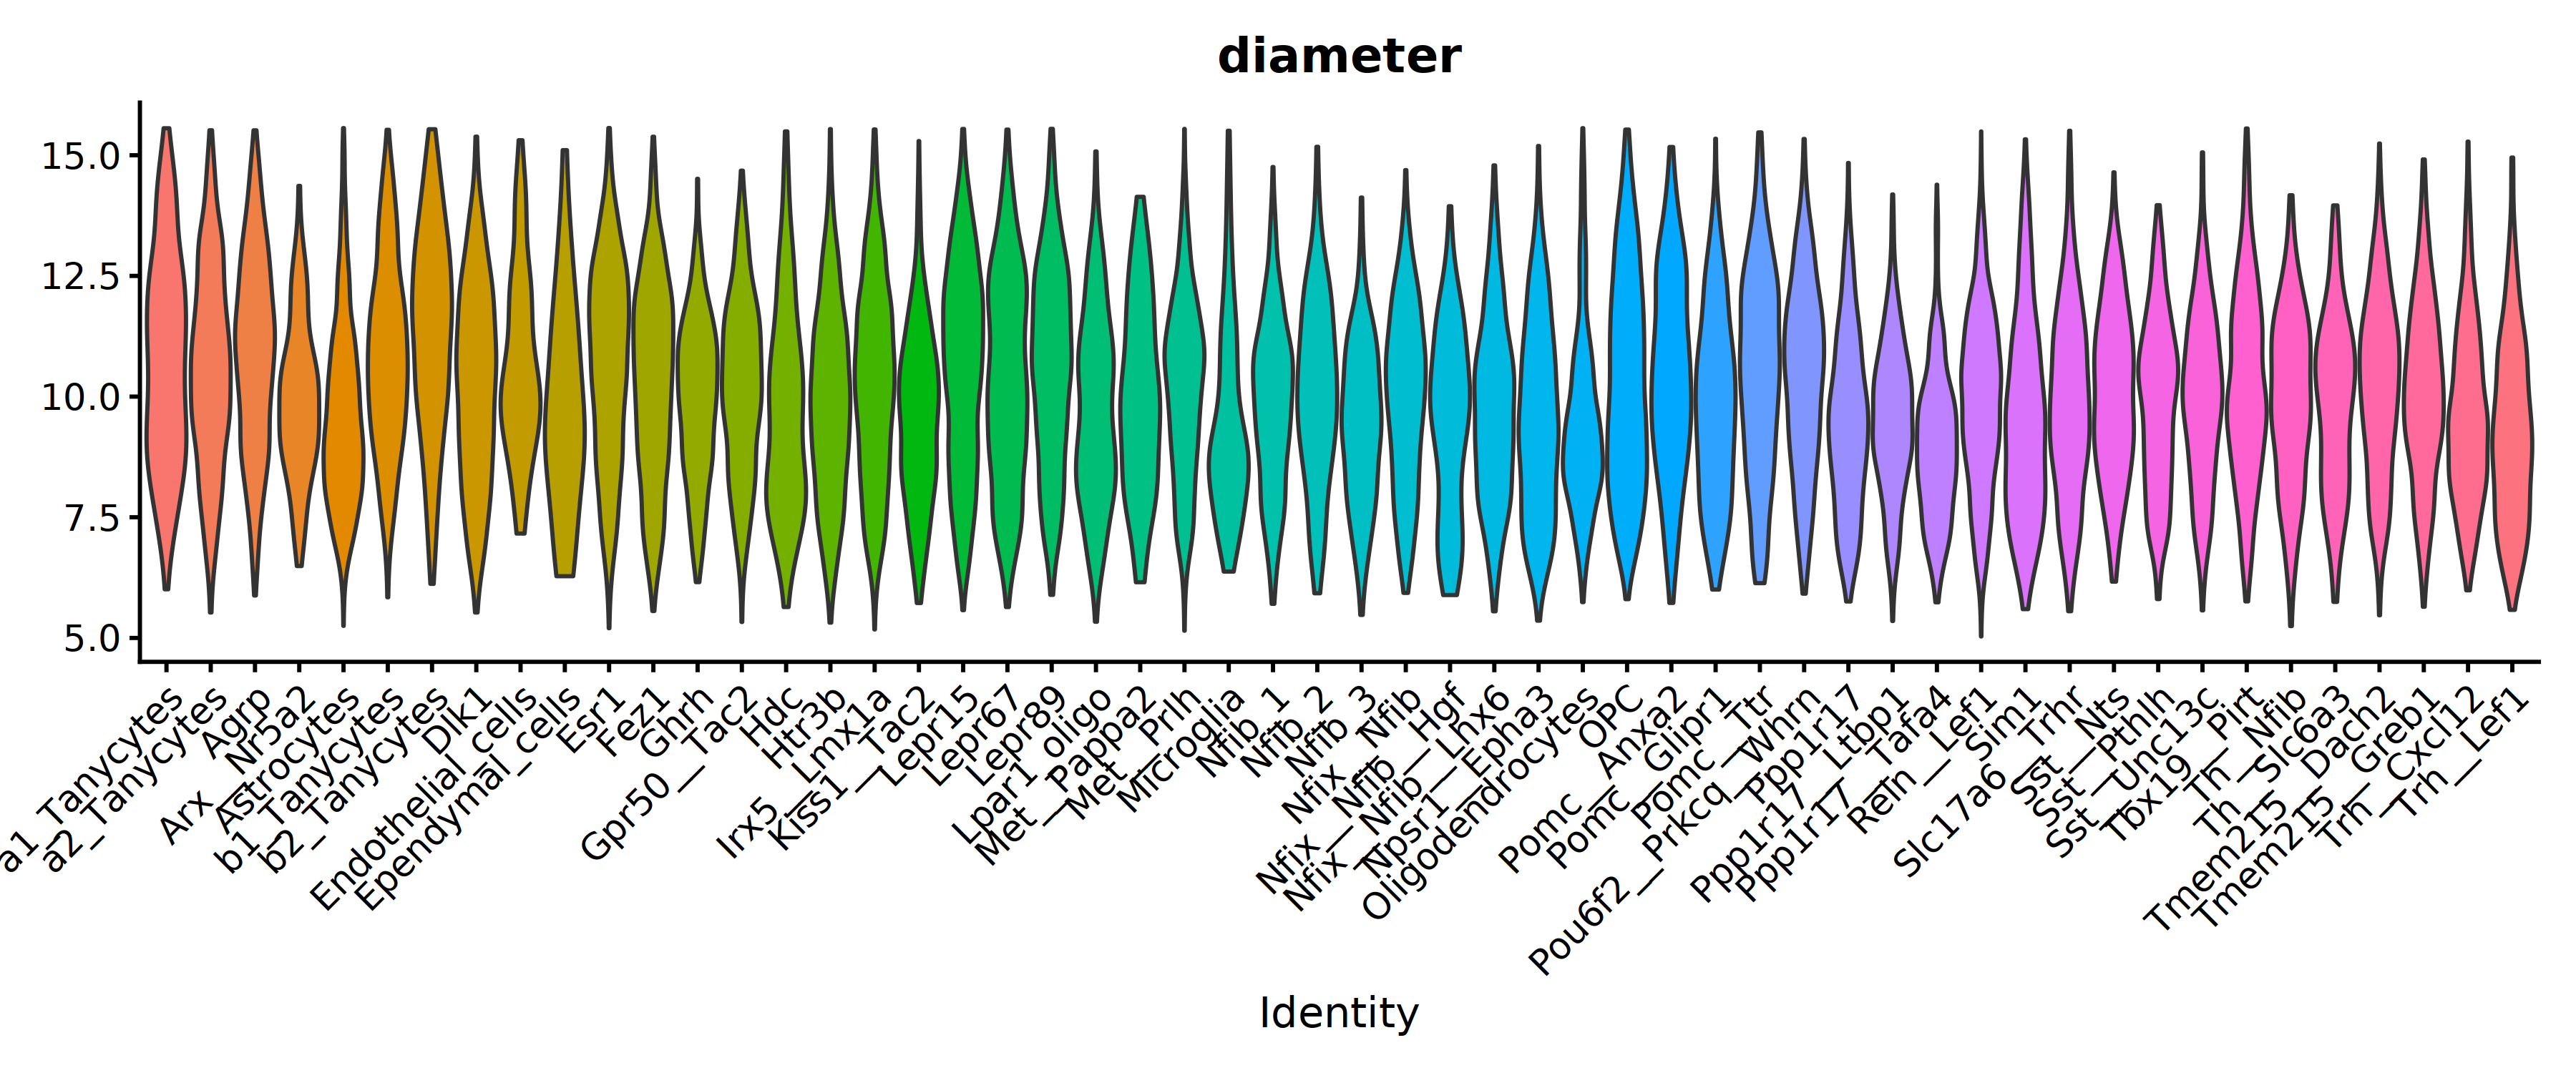

In [121]:
options(repr.plot.width=12, repr.plot.height=5, repr.plot.res=300) 
obj %>% subset(subset = nCount_Xenium >= 100) %>%  VlnPlot(features = 'diameter', group.by='labels', pt.size = 0) + NoLegend()

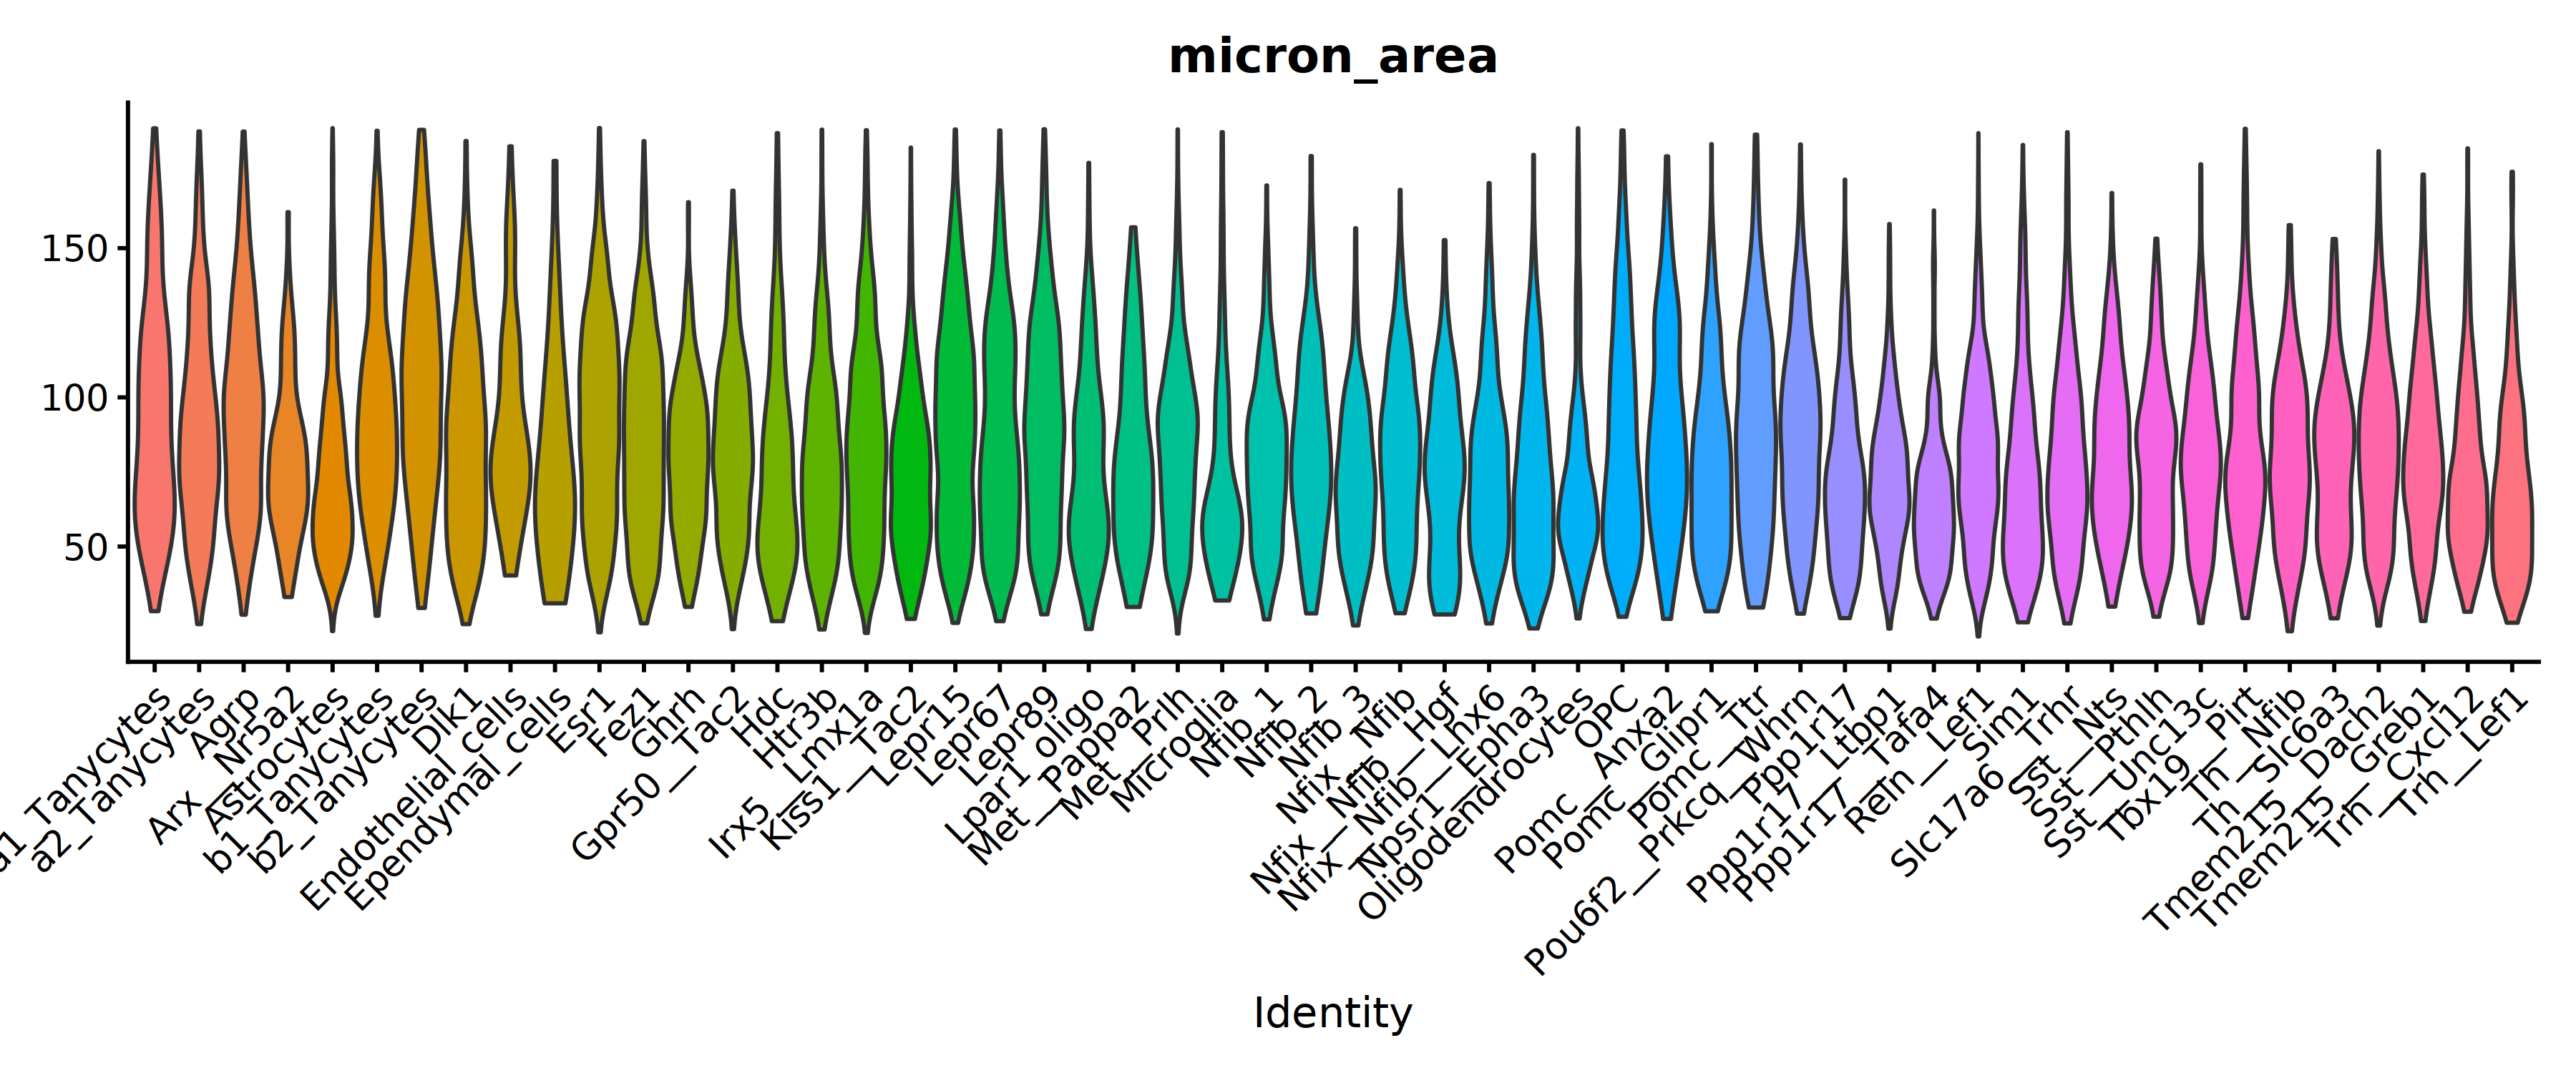

In [122]:
options(repr.plot.width=12, repr.plot.height=5, repr.plot.res=300) 
obj %>% subset(subset = nCount_Xenium >= 100) %>%  VlnPlot(features = 'micron_area', group.by='labels', pt.size = 0) + NoLegend()

In [123]:
obj %>% subset(subset = nCount_Xenium >= 100) %>% `[[` %>% group_by(labels) %>% summarise(min_area = min(micron_area))

Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating

labels              min_area
1  Agrp                27.15674
2  Arx__Nr5a2          33.07943
3  Astrocytes          21.65303
4  Dlk1                23.99544
5  Endothelial_cells   40.29710
6  Ependymal_cells     30.96554
7  Esr1                21.25310
8  Fez1                24.26206
9  Ghrh                29.76577
10 Gpr50__Tac2         22.31957
11 Hdc                 24.98573
12 Htr3b               22.20530
13 Irx5__Lmx1a         21.04362
14 Kiss1__Tac2         25.72844
15 Lepr15              24.41441
16 Lepr67              24.98573
17 Lepr89              27.27101
18 Lpar1_oligo         22.35766
19 Met__Pappa2         29.74673
20 Met__Prlh           20.83414
21 Microglia           31.91774
22 Nfib_1              25.57609
23 Nfib_2              27.57571
24 Nfib_3              23.55743
25 Nfix__Nfib          27.65189
26 Nfix__Nfib__Hgf     27.23292
27 Nfix__Nfib__Lhx6    24.20492
28 Npsr1__Epha3        22.54810
29 OPC                 26.45212
30 Oligodendrocytes    25.89984
31 Pomc__Anxa2         25.74749
32 Pomc__Glipr1        28.29938
33 Pomc__Ttr           29.55629
34 Pou6f2__Prkcq__Whrn 27.49954
35 Ppp1r17             26.01410
36 Ppp1r17__Ltbp1      22.49096
37 Ppp1r17__Tafa4      25.86175
38 Reln__Lef1          19.88194
39 Sim1                24.60485
40 Slc17a6__Trhr       24.22397
41 Sst__Nts            29.86099
42 Sst__Pthlh          26.47116
43 Sst__Unc13c         24.37632
44 Tbx19__Pirt         26.03315
45 Th__Nfib            21.61494
46 Th__Slc6a3          25.93793
47 Tmem215__Dach2      23.50030
48 Tmem215__Greb1      25.04286
49 Trh__Cxcl12         28.14703
50 Trh__Lef1           24.47154
51 a1_Tanycytes        28.35652
52 a2_Tanycytes        23.99544
53 b1_Tanycytes        26.81395
54 b2_Tanycytes        29.42298

In [78]:
xenium_genes = qs::qread('_targets/objects/xenium_genes')

In [80]:
obj = obj  %>% 
                 filter_down_cells_v02 %>% 
                 process_xenium(xenium_genes=xenium_genes) %>%
                annotate_by_level_v02(counts_assay='Xenium', 
                                           graph_name=NULL, 
                                           classification_data_path='resolve_major_classes_markers_v2.txt', 
                                           annotation_col='class')

Normalizing layer: counts

Centering and scaling data matrix

Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  Aqp4, Slc7a11, Rax, Lrmda, Rgs6, Pdzrn3, Slc1a2, Plp1, Agrp, Sox5 
	   Trpm3, Bmp4, Cfap299, Gpc5, Pdgfra, Gpc6, Pcdh9, Erbb4, Ptprk, Fat3 
	   Pomc, Luzp2, P3h2, Htr3b, Pcdh11x, Il1rapl2, Rmst, Lef1, Ptprt, Hdac9 
Negative:  Tenm2, Grm7, Rbfox1, Lingo2, Hs3st4, Kcnip4, Kcnq3, Grm8, Brinp3, Pde10a 
	   Cacna2d3, Sgcz, Cntn5, Nrxn3, Car10, Gabrg3, Prkg1, Dcc, Fgf13, Cntn4 
	   Ncam2, Lrp1b, Nxph1, Nkain2, Galntl6, Nrg1, Col25a1, Mgat4c, Prr16, Oxr1 
PC_ 2 
Positive:  Luzp2, Trpm3, Slc7a11, Aqp4, Gpc5, Cadm2, Slc1a2, Erbb4, Robo1, Ptprt 
	   Plcb1, Lrp1b, Fat3, Alcam, Rgs6, Tenm3, Sox5, Kirrel3, Gpc6, Rmst 
	   Lef1, Sgcd, Pdgfra, Brinp3, Ptprd, Mgat4c, Dcc, Lrmda, Hdac9, Pde4b 
Negative:  Agrp, Deptor, Arhgap6, Hs3st4, Plcl1, Kcnip4, Pomc, Rbfox1, Grm8, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 40205
Number of edges: 1810405

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8959
Number of communities: 110
Elapsed time: 14 seconds


46 singletons identified. 64 final clusters.



ERROR: Error in annotate_by_level_v02(., counts_assay = "Xenium", graph_name = NULL, : trying to get slot "cell.embeddings" from an object of a basic class ("NULL") with no slots


In [81]:
obj

An object of class Seurat 
400 features across 40205 samples within 4 assays 
Active assay: Xenium (100 features, 85 variable features)
 3 layers present: counts, data, scale.data
 3 other assays present: BlankCodeword, ControlCodeword, ControlProbe
 1 dimensional reduction calculated: pca
 8 spatial fields of view present: fov fov.2 fov.3 fov.4 fov.5 fov.6 fov.7 fov.8

In [55]:
obj@active.ident %>% length

[1] 40205

In [60]:
obj@reductions$pca

[1] 40205

In [61]:
library(CellAnnotatoR)

In [73]:
                             counts_assay='Xenium'
                             graph_name=NULL
                             classification_data_path='resolve_major_classes_markers_v2.txt'
                             annotation_col='class'
    #uses conos, cellannotater
    if (is.null(counts_assay)) {
        counts_assay = obj@active.assay
    }
    
    cm <- obj@assays[[counts_assay]] %>% 
#         JoinLayers %>% 
        `$`('counts')
    
    if (!is.null(graph_name)){
        if (graph_name == 'active_snn'){
            graph_name = paste0(counts_assay, '_snn')
            graph <- obj@graphs[[graph_name]]
        } else {
            graph <- obj@graphs[[graph_name]]
        }
    } else {
        graph = NULL
    }
    emb <- obj@reductions$umap@cell.embeddings
    clusters <- setNames(obj@meta.data$seurat_clusters, rownames(obj@meta.data))
    clf_data <- getClassificationData(cm, classification_data_path)
    ann_by_level <- assignCellsByScores(graph=graph, clf_data, clusters=clusters)
    Idents(obj) <- ann_by_level$annotation$l1
#     p2 = DimPlot(obj, reduction = "umap", label=T, repel = T)+NoLegend() 
    obj[[annotation_col]] <- obj@active.ident
    obj@misc$clf_data = clf_data
    obj@misc$ann_by_level = ann_by_level
    obj

An object of class Seurat 
500 features across 40205 samples within 5 assays 
Active assay: SCT (100 features, 99 variable features)
 3 layers present: counts, data, scale.data
 4 other assays present: Xenium, BlankCodeword, ControlCodeword, ControlProbe
 2 dimensional reductions calculated: pca, umap
 8 spatial fields of view present: fov fov.2 fov.3 fov.4 fov.5 fov.6 fov.7 fov.8

In [74]:
obj %>% `[[` %>% distinct(class)

class 
Cell10000_9129_13312_1 neuron
Cell10006_3751_1404_1  other

In [8]:
high_conf_cells = qs::qread('_targets/objects/high_conf_cells_class')

In [33]:
cells_10k = sample(high_conf_cells,size = 10000, replace = F)

In [34]:
obj = obj %>% subset(cells = high_conf_cells) %>% subset(cells = cells_10k)

Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating

In [35]:
obj

An object of class Seurat 
500 features across 10000 samples within 5 assays 
Active assay: SCT (100 features, 99 variable features)
 3 layers present: counts, data, scale.data
 4 other assays present: Xenium, BlankCodeword, ControlCodeword, ControlProbe
 2 dimensional reductions calculated: pca, umap
 8 spatial fields of view present: fov fov.2 fov.3 fov.4 fov.5 fov.6 fov.7 fov.8

In [43]:
selected_cells = obj %>% `[[` %>% filter(class == 'neuron') %>% rownames

In [45]:
selected_cells %>% length

[1] 4880

In [28]:
obj = obj %>% subset(cells = selected_cells)

Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Centroids objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating FOV objects”
Warning message:
“Not validating Seurat objects”
Warning message:
“Not validating FOV objects”


ERROR: Error in subset.Centroids(x = x[[i]], cells = cells): None of the requested cells found


In [26]:
obj

An object of class Seurat 
500 features across 39882 samples within 5 assays 
Active assay: SCT (100 features, 99 variable features)
 3 layers present: counts, data, scale.data
 4 other assays present: Xenium, BlankCodeword, ControlCodeword, ControlProbe
 2 dimensional reductions calculated: pca, umap
 8 spatial fields of view present: fov fov.2 fov.3 fov.4 fov.5 fov.6 fov.7 fov.8

In [23]:
high_conf_cells %>% length

[1] 39882